In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# Part-3.1 : Demonstration of Clustering Algorithms on Chicago Dataset

# 1. Fetching Chicago taxi data
- Observed that the dataframe has 101,788 entries, ranging from index 0 to 101,787.

In [4]:
chicago_taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
chicago_taxi_df = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
chicago_taxi_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


# 2. Displaying information about the Chicago Taxi DataFrame
- Observed that both columns are of the float64 data type.
- "Pickup Centroid Latitude" and "Pickup Centroid Longitude" have 95,657 non-null entries each, indicating the number of non-missing values.

In [5]:
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


# 3. Descriptive Statistics for Chicago Taxi Data¶
- Observed that he latitude values range from approximately 41.66 to 42.02, covering a span of about 0.36 degrees.
- The longitude values range from approximately -87.91 to -87.53, covering a span of about 0.38 degrees.

In [6]:
chicago_taxi_df.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


# 4. Distribution Comparison of Pickup Centroid Latitude and Longitude
The data has a relatively small spread around the mean, with a standard deviation of 0.06 for latitude.
The distribution looks somewhat symmetrical, as the mean and median are close for latitude.
The data has a moderate spread around the mean, with a standard deviation of 0.10 for longitude.
The distribution looks somewhat symmetrical, as the mean and median are close fpr longitude.

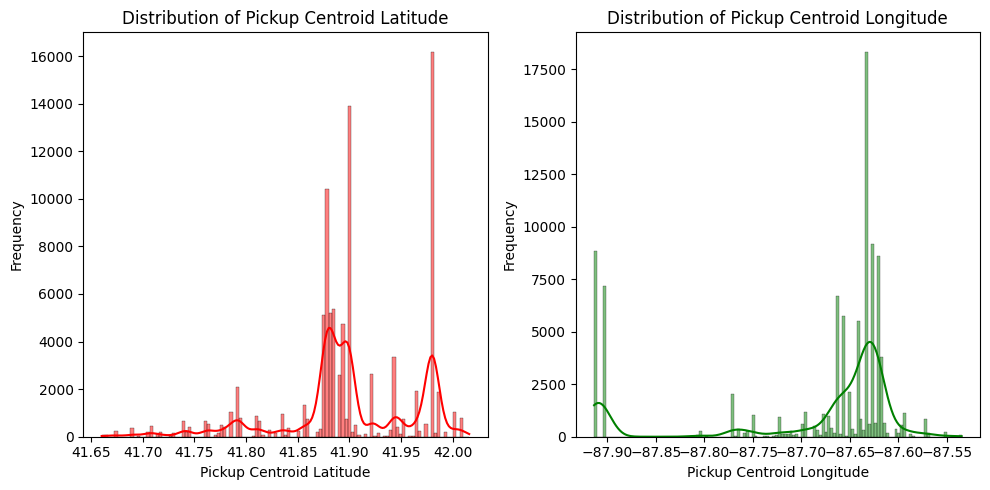

In [7]:
plt.figure(figsize=(10, 5))

# Plot for 'Pickup Centroid Latitude'
plt.subplot(1, 2, 1)
sns.histplot(chicago_taxi_df['Pickup Centroid Latitude'], kde=True, color='red')
plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Latitude')

# Plot for 'Pickup Centroid Longitude'
plt.subplot(1, 2, 2)
sns.histplot(chicago_taxi_df['Pickup Centroid Longitude'], kde=True, color='green')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Longitude')

plt.tight_layout()

plt.show()

# 5. Correlation Heatmap for Chicago Taxi Data

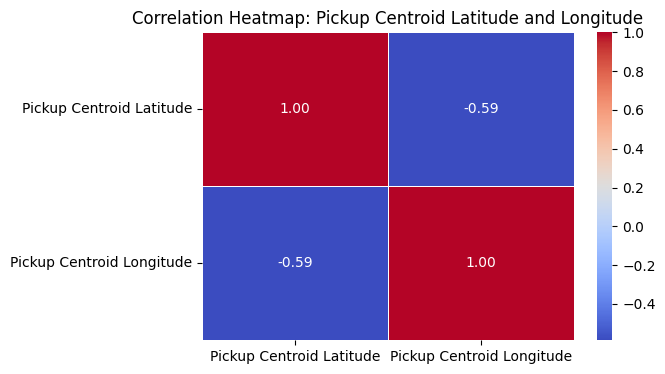

In [8]:
heatmap_data = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Pickup Centroid Latitude and Longitude')
plt.show()

# 6. Scatter Plot 

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Pickup Centroid Longitude'>

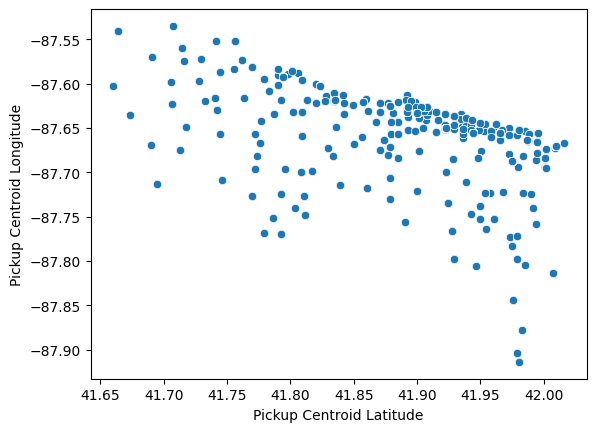

In [9]:
sns.scatterplot(data=chicago_taxi_df, x=chicago_taxi_df['Pickup Centroid Latitude'], y=chicago_taxi_df['Pickup Centroid Longitude'])

# 7. Checking for undefined values in dataframe

In [10]:
chicago_taxi_df.isnull().sum()

Pickup Centroid Latitude     6131
Pickup Centroid Longitude    6131
dtype: int64

# 8. Cleaning the dataframe
- Cleaning the dataframe by remvoing undefind values

In [11]:
cleaned_taxi_df = chicago_taxi_df.dropna(inplace=True)
cleaned_taxi_df

# 9. Standardize the features
- Importing StandardScaler
- Extracting features 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_taxi = scaler.fit_transform(chicago_taxi_df)

# 10. Answers for questions mentioned in assignment pdf
- I chose k-means for its simplicity and efficiency in handling numerical data, suitable for exploratory clustering.
- Handled missing values, standardized features using StandardScaler, and determined k through iterative experimentation as a part f pre-   processing
- Will give Visual representation of  k-means output with a scatter plot, color-coding data points by assigned clusters below.
- Will use silhouette score and Davies-Bouldin index; results align with expectations, providing valuable insights for further analysis.

# 11. Reducing th size of the data

# 11. Applying K-Means on Chicago taxi data

In [13]:
np.random.seed(42)
indices = np.random.choice(df_taxi.shape[0], size=100, replace=False)
df_taxi_sample = df_taxi[indices]

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_taxi)
kmeans_score = silhouette_score(df_taxi, kmeans_labels)

print(f"Kmean Silhouette Score: {kmeans_score}")

Kmean Silhouette Score: 0.6991851328343985


# 12. Applying DBSCAN on Chicago taxi data

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_taxi_sample)
dbscan_score = silhouette_score(df_taxi_sample, dbscan_labels)

print(f"DBSCAN Silhouette Score: {dbscan_score}")

DBSCAN Silhouette Score: 0.5954026366571079


# 13. Applying Hierarchical on Chicago taxi data

In [41]:
np.random.seed(42)
indices = np.random.choice(df_taxi.shape[0], size=500, replace=False)
df_taxi_sample = df_taxi[indices]

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_taxi_sample)
hierarchical_score = silhouette_score(df_taxi_sample, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_score}")

Hierarchical Silhouette Score: 0.6397804302410524


# 14. Visualization of K-Means, DBSCAn and Hierarchical
- Applying the k-means algorithm, DBSCAN and Hierarchical to preprocessed Chicago taxi data with scaled features.
- Visualizing the resulting clusters on a scatter plots, where each data point is color-coded based on its assigned cluster.

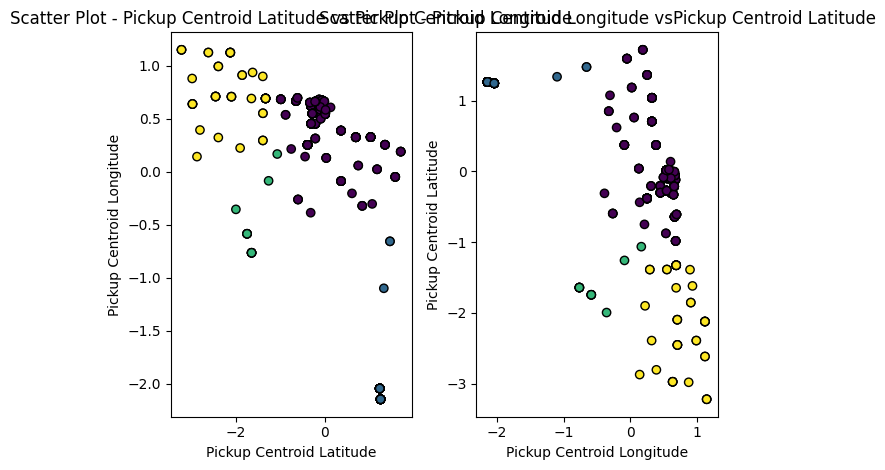

In [60]:
np.random.seed(42)
indices = np.random.choice(df_taxi.shape[0], size=500, replace=False)
df_taxi_sample = df_taxi[indices]

# Scatter plot for the first column
plt.subplot(1, 2, 1)
plt.scatter(df_taxi_sample[:, 0], df_taxi_sample[:, 1], c=kmeans_labels[indices], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot - Pickup Centroid Latitude vs Pickup Centroid Longitude')
plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Pickup Centroid Longitude')

# Scatter plot for the second column
plt.subplot(1, 2, 2)
plt.scatter(df_taxi_sample[:, 1], df_taxi_sample[:, 0], c=kmeans_labels[indices], cmap='viridis', edgecolor='k')
plt.title('Scatter Plot - Pickup Centroid Longitude vsPickup Centroid Latitude')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')

plt.tight_layout()
plt.show()

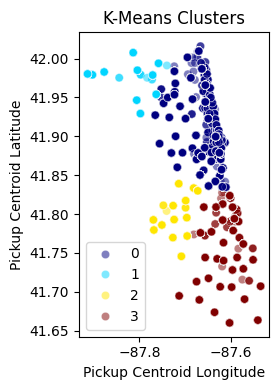

In [36]:
plt.figure(figsize=(7, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=chicago_taxi_df, x='Pickup Centroid Longitude', y='Pickup Centroid Latitude', hue=kmeans_labels[:chicago_taxi_df.shape[0]], palette=plt.get_cmap('jet'), alpha=0.5)
plt.title('K-Means Clusters')

plt.tight_layout()
plt.show()